In [1]:
using Plots, LaTeXStrings, ColorSchemes, ProgressMeter

include("./Optimized_Model.jl")

In [2]:
#Init the Obstacles
#positions
x_Elements = [(8.0, 8.1)]
#sizes
l_Elements = [0.5]

obstacle = Create_Geometry(x_Elements, l_Elements);

#Calc η matrix for plotting
x = collect(-1.0:0.01:11.0)
y = collect(-1.0:0.01:11.0)

η_Matrix = Calc_η_Matrix(x, y, obstacle);

In [3]:
#Init the Agent
start = (0.0, 0.0)
goal = (10.0, 10.0)
v_des = 1.0
δt = 0.25
α = 1.0 #biomech
β = 0.0 #no meaning
ϵ = 0.0 #time dilution
γ = 0.001 #gradient stepsize

a = Create_Agent(start, goal, δt, v_des, α, β, ϵ, γ)
Init_Initial_Guess!(a)

In [4]:
#E_BioMech(a::agent, p1::NTuple{2, Float64}, p2::NTuple{2, Float64}) = a.α * (d(p1, p2))^2

E_BioMech(a::agent, p1::NTuple{2, Float64}, p2::NTuple{2, Float64}) = a.α*(δt*(1+a.ϵ))*(d(p1, p2)/(δt*(1+a.ϵ))-a.v_des)^2


E_BioMech (generic function with 1 method)

In [5]:
steps = 10000
Δsteps_saved = 1000
ΔE = 0.00005

#Run the Optimization:

#trajectories, energies = Run_Ordered_Optimization!(a, obstacle, steps, Δsteps_saved, ΔE);
trajectories, energies = Run_Parallel_Optimization!(a, obstacle, steps, Δsteps_saved, ΔE);


Progress:   0%|                                         |  ETA: 0:31:29

Convergence criterum was met at step 7591!


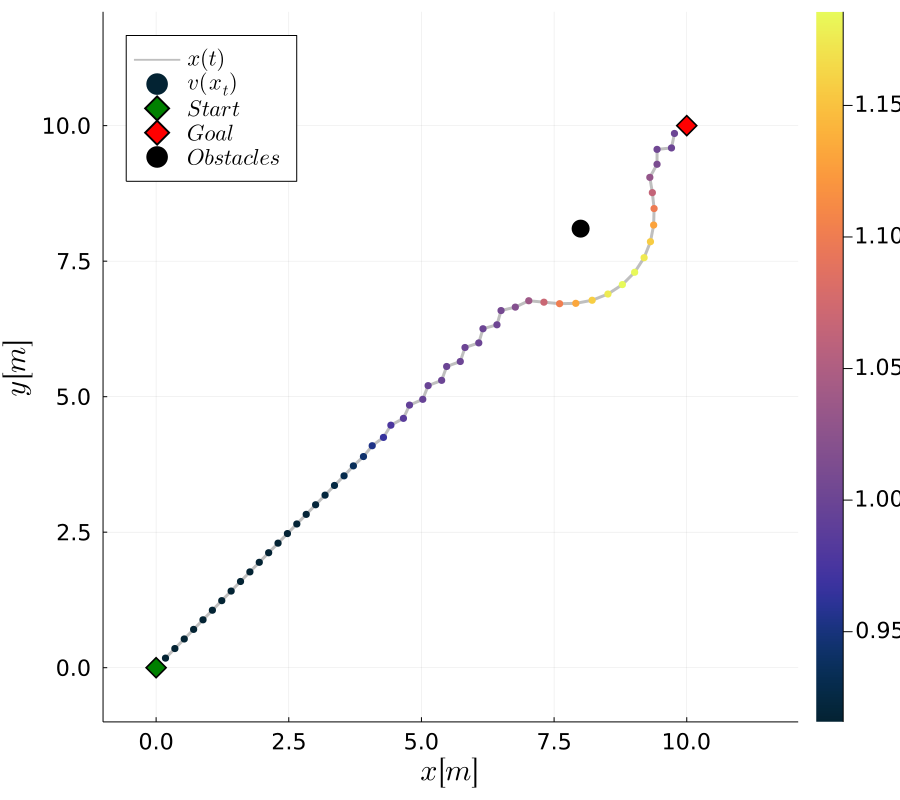

In [6]:
Plots.scalefontsizes()
Plots.scalefontsizes(2)


plot(layout=(1,1), legend=:topleft, legendfontsize = 15,
    xtickfontsize=15, ytickfontsize=15, xguidefontsize=20, yguidefontsize=20)

plot!(trajectories[end, :],  linewidth = 3, color =:grey, alpha = 0.5, label=L"x(t)")

scatter!(trajectories[end, :], marker_z = v(trajectories[end, :], start, goal, δt*(1+a.ϵ)),
    markersize = 4, alpha = 1, msw = 0, c = :thermal, label =L"v(x_t)")


scatter!(a.start, label = L"Start", markersize=10, msw = 1, shape=:diamond, color =:green)
scatter!(a.goal, label = L"Goal", markersize=10, msw = 1, shape=:diamond, color =:red)

scatter!(obstacle.element[1].x, color = "black", markersize=20*obstacle.element[1].l, msw = 0, label = L"Obstacles")

for o in obstacle.element[2:end]
    scatter!(o.x, color = "black", markersize=20*o.l, msw = 0, label = false)
end


plot!(xlabel=L"x [m]") 
plot!(ylabel=L"y [m]")
#plot!(zlabel=L"v [m/s]")

plot!(ylims = (-1.0, 12.1))
plot!(xlims = (-1.0, 12.1))


plot!(size=(900,800))

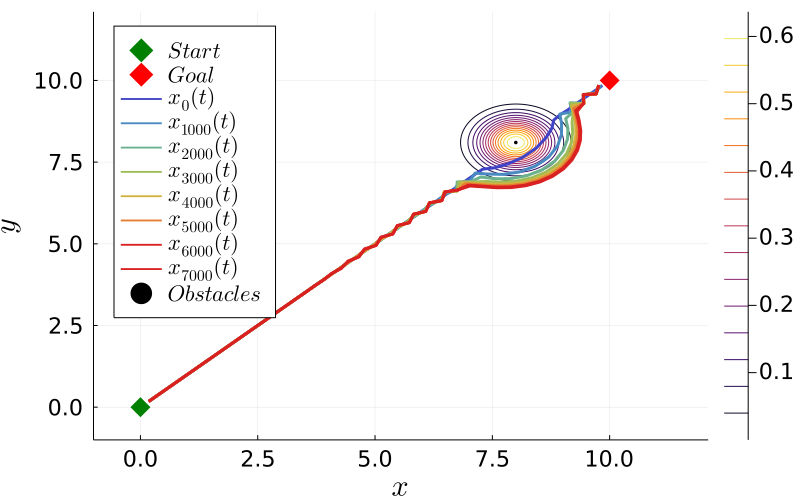

In [7]:
#plot the result
Plots.scalefontsizes()
Plots.scalefontsizes(2)


plot(layout=(1,1), legend=:topleft, legendfontsize = 15,
    xtickfontsize=15, ytickfontsize=15, xguidefontsize=20, yguidefontsize=20)

contour!(x, y, η_Matrix, fill = false)
#scatter!(a.traj, label = L"\vec{x}_0", markersize = 3, msw = 0, color=:blue)
scatter!(a.start, label = L"Start", markersize=10, msw = 0, shape=:diamond, color =:green)
scatter!(a.goal, label = L"Goal", markersize=10, msw = 0, shape=:diamond, color =:red)

for i in 1:size(trajectories)[1]
    label_i = latexstring("x_{", (i-1)*Δsteps_saved, "}(t)")
    c = get(ColorSchemes.rainbow, i./(size(trajectories)[1]-1))
    plot!(trajectories[i, :], label = label_i, linewidth = 3, color = c)
end

scatter!(obstacle.element[1].x, color = "black", markersize=2, msw = 0, label = L"Obstacles")

for o in obstacle.element[2:end]
    scatter!(o.x, color = "black", markersize=2, msw = 0, label = false)
end



plot!(xlabel=L"x") 
plot!(ylabel=L"y")

plot!(ylims = (-1.0, 12.1))
plot!(xlims = (-1.0, 12.1))


plot!(size=(800,500))